<a href="https://colab.research.google.com/github/ImVikashKr/Resourse/blob/main/2_Classification_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Logistic Regression**

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.

Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.

Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification. The below image is showing the logistic function:

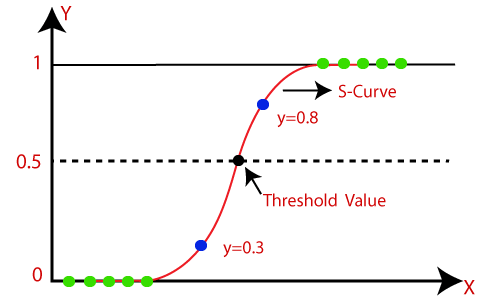

In **Logistic Regression**, the log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

### \begin{align*}
    \log \left({p\over 1-p}\right) &= w_0 + w_1x_1, ..., w_jx_j \nonumber \\
    &= w^Tx \nonumber
\end{align*}

where:

- $w_{0}$ is the intercept term, and $w_1$ to $w_j$ represents the parameters for all the other features (a total of j features).
- By convention of we can assume that $x_0 = 1$, so that we can re-write the whole thing using the matrix notation $w^Tx$.

This is called the **logit function**. The equation can be re-arranged into the **logistic function**:

### $$p = \frac{e^{w^Tx}} {1 + e^{w^Tx}}$$

Or in the more commonly seen form:

### $$h_w(x) = \frac{1}{ 1 + e^{-w^Tx} }$$



### <b> Defining the cost function for Logistic Regression </b>

When utilizing logistic regression, we are trying to learn the $w$ values in order to maximize the probability of correctly classifying our glasses. Let's say someone did give us some $w$ values of the logistic regression model, how would we determine if they were good values or not? What we would hope is that for the household of class 1, the probability values are close to 1 and for the household of class 0 the probability is close to 0.

But we don't care about getting the correct probability for just one observation, we want to correctly classify all our observations. If we assume our data are independent and identically distributed (think of it as all of them are treated equally), we can just take the product of all our individually calculated probabilities and that becomes the objective function we want to maximize. So in math:  

$$\prod_{class1}h_w(x)\prod_{class0}1 - h_w(x)$$

The $\prod$ symbol means take the product of the $h_w(x)$ for the observations that are classified as that class. You will notice that for observations that are labeled as class 0, we are taking 1 minus the logistic function. That is because we are trying to find a value to maximize, and since observations that are labeled as class 0 should have a probability close to zero, 1 minus the probability should be close to 1. This procedure is also known as the **maximum likelihood estimation**.

Next we will re-write the original cost function as:

### $$\ell(w) = \sum_{i=1}^{N}y_{i}log(h_w(x_{i})) + (1-y_{i})log(1-h_w(x_{i}))$$

where:

- We define $y_{i}$ to be 1 when the $i_{th}$ observation is labeled class 1 and 0 when labeled as class 0, then we only compute $h_w(x_{i})$ for observations that are labeled class 1 and $1 - h_w(x_{i})$ for observations that are labeled class 0, which is still the same idea as the original function.
- Next we'll transform the original $h_w(x_{i})$ by taking the log. As we'll later see this logarithm transformation will make our cost function more convenient to work with, and because the logarithm is a monotonically increasing function, the logarithm of a function achieves its maximum value at the same points as the function itself. When we take the log, our product across all data points, it becomes a sum.
- The $N$ simply represents the total number of the data.

Often times you'll also see the notation above be simplified in the form of a maximum likelihood estimator:

### $$ \ell(w) = \sum_{i=1}^{N} log \big( P( y_i \mid x_i, w ) \big) $$

The equation above simply denotes the idea that , $\mathbf{w}$ represents the parameters we would like to estimate the parameters $w$ by maximizing conditional probability of $y_i$ given $x_i$.

Now by definition of probability in the logistic regression model:
###  $h_w(x_{i}) = \frac{1}{1 + e^{-w^T x_i}}$ and $1- h_w(x_{i}) = \frac{e^{ -w^T x_i }} {1 + e^{ -w^T x_i } }$.

By substituting these expressions into our $\ell(w)$ equation and simplifying it further we can obtain  a simpler expression.

### $$
\begin{align}
\ell(w)
&= \sum_{i=1}^{N}y_{i}log(h_w(x_{i})) + (1-y_{i})log(1-h_w(x_{i})) \nonumber \\
&= \sum_{i=1}^{N} y_{i} log( \frac{1}{ 1 + e^{ -w^T x_i } } ) + ( 1 - y_{i} )
log( \frac{ e^{ -w^T x_i } }{ 1 + e^{ -w^T x_i } } ) \nonumber \\
&= \sum_{i=1}^{N} -y_{i} log( 1 + e^{ -w^T x_i } ) + ( 1 - y_{i} )
( -w^T x_i - log( 1 + e^{ -w^T x_i } ) ) \nonumber \\
&= \sum_{i=1}^{N} ( y_{i} - 1 ) ( w^T x_i ) - log( 1 + e^{ -w^T x_i } ) \nonumber
\end{align}
$$

### **Gradient Descent on Logistic Cost Function**

Now that we obtain the formula to assess our algorithm, we'll dive into the meat of the algorithm, which is to derive the gradient for the formula (the derivative of the formula with respect to each coefficient):

### $$\ell(w) = \sum_{i=1}^{N} ( y_{i} - 1 ) ( w^T x_i ) - log( 1 + e^{ -w^T x_i } )$$

And it turns out the derivative of log likelihood with respect to to a single coefficient $w_j$ is as follows (the form is the same for all coefficients):

### $$
\frac{\partial\ell(w)}{\partial w_j} = \sum_{i=1}^N (x_{ij})\left( y_i - \frac{1}{ 1 + e^{-w^Tx_i} } \right )
$$

To compute it, you simply need the following two terms:

- ### $\left( y_i - \frac{1}{ 1 + e^{-w^Tx_i} } \right )$ is the vector containing the difference between the predicted probability and the original label.
- ### $x_{ij}$ is the vector containing the $j_{th}$ feature's value.

**Updating model parameters using Gradient Descent**

Recall our task is to find the optimal value for each individual weight to lower the cost. This requires taking the partial derivative of the cost/error function with respect to a single weight, and then running gradient descent for each individual weight to update them. Thus, for any individual weight $w_j$, we'll compute the following:

### $$ w_j^{(t + 1)} = w_j^{(t)} + \alpha * \sum_{s = i}^{i+B} \frac{\partial\ell_s(w)}{\partial w_j}$$

where:

- $\alpha$ denotes the the learning rate or so called step size, in other places you'll see it denoted as $\eta$.
- $w_j^{(t)}$ denotes the weight of the $j_{th}$ feature at iteration $t$.

And we'll do this iteratively for each weight, many times, until the whole network's cost function is minimized.

###**Assumptions for Logistic Regression:**

* The dependent variable must be categorical in nature.

* The independent variable should not have multi-collinearity.

###**Type of Logistic Regression:**

On the basis of the categories, Logistic Regression can be classified into three types:

**Binomial:** In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, Pass or Fail, etc.

**Multinomial:** In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"

**Ordinal:** In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".

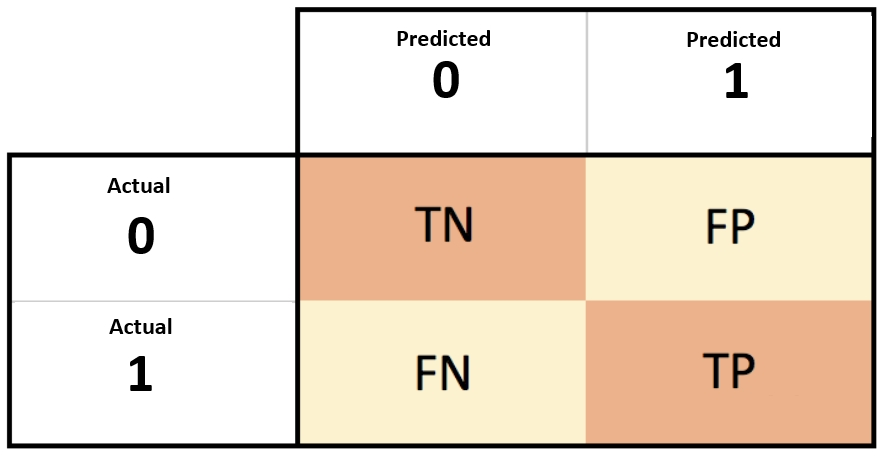

###<b><u> Evaluation metrics for classification models </u></b>

* <b><u>Accuracy</u></b> : Accuracy will require two inputs (i) actual class labels (ii)predicted class labels. To get the class labels from probabilities( these probabilities will be probabilities of getting a HIT), you can take a threshold of 0.5. Any probability above 0.5 will be labeled as class 1 and anything less than 0.5 will be labeled as class 0.


* <b><u>Precision</u></b> :  Precision for a label is defined as the number of true positives divided by the number of predicted positives. Report precision in percentages.

* <b><u>Recall</u></b> : Recall for a label is defined as the number of true positives divided by the total number of actual positives. Report recall in percentages.

* <b><u>F1-Score</u></b> : This is defined as the harmonic mean of precision and recall.

* <b><u>Log Loss</u></b> : This is defined as \begin{align*}
  Log Loss &= \sum_{i=1}^{M} [ y^{i}log(P^{i}) + (1- y^{i})log(1 - P^{i} )]\\
\end{align*}

Here M refers to the number of observations and $y^{i}$ = 1 or 0 depending upon the label for the $i^{th}$ observation and $P^{i}$ is the probability of class 1 or probability of getting a HIT.

* <b><u>AUC-ROC</u></b> - The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.


###**Why is Logistic Regression called Regression and not Classification?**

Although the task we are targeting in logistic regression is a classification, logistic regression does not actually individually classify things for you: it just gives you probabilities (or log odds ratios in the logit form).

The only way logistic regression can actually classify stuff is if you apply a rule to the probability output. For example, you may round probabilities greater than or equal to 50% to 1, and probabilities less than 50% to 0, and that’s your classification.

###**Compare SVM and Logistic Regression in handling outliers**

For Logistic Regression, outliers can have an unusually large effect on the estimate of logistic regression coefficients. It will find a linear boundary if it exists to accommodate the outliers. To solve the problem of outliers, sometimes a sigmoid function is used in logistic regression.

For SVM, outliers can make the decision boundary deviate severely from the optimal hyperplane. One way for SVM to get around the problem is to intrduce slack variables. There is a penalty involved with using slack variables, and how SVM handles outliers depends on how this penalty is imposed.

###**How a Logistic Regression model is trained?**

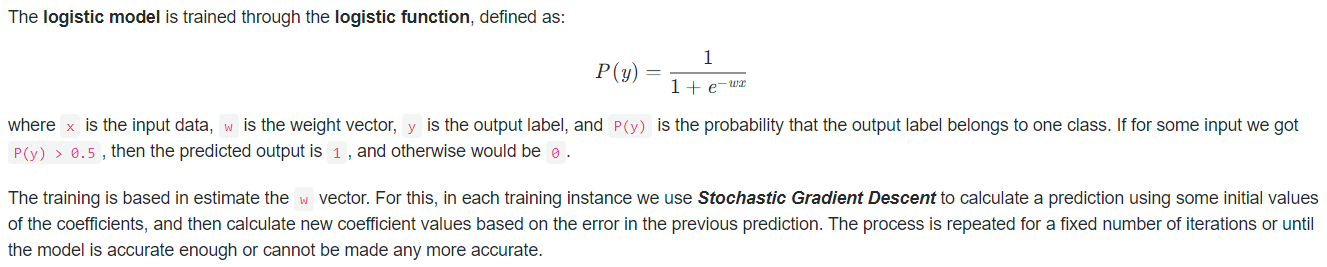

###**How do you use a supervised Logistic Regression for Classification?**

Logistic regression is a statistical model that utilizes logit function to model classification problems. It is a regression analysis to conduct when the dependent variable is binary. The logit function is shown below:

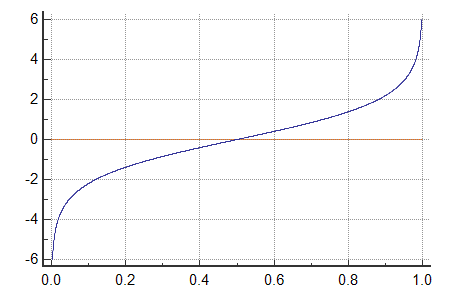

Looking at the logit function, the next question that comes to mind is how to fit that graph/equation. The fitting of the logistic regression is done using the maximum likelihood function.

In a supervised logistic regression, features are mapped onto the output. The output is usually a categorical value (which means that it is mapped with one-hot vectors or binary numbers).

Since the logit function always outputs a value between 0 and 1, it gives the probability of the outcome.

###**Provide a mathematical intuition for Logistic Regression?**

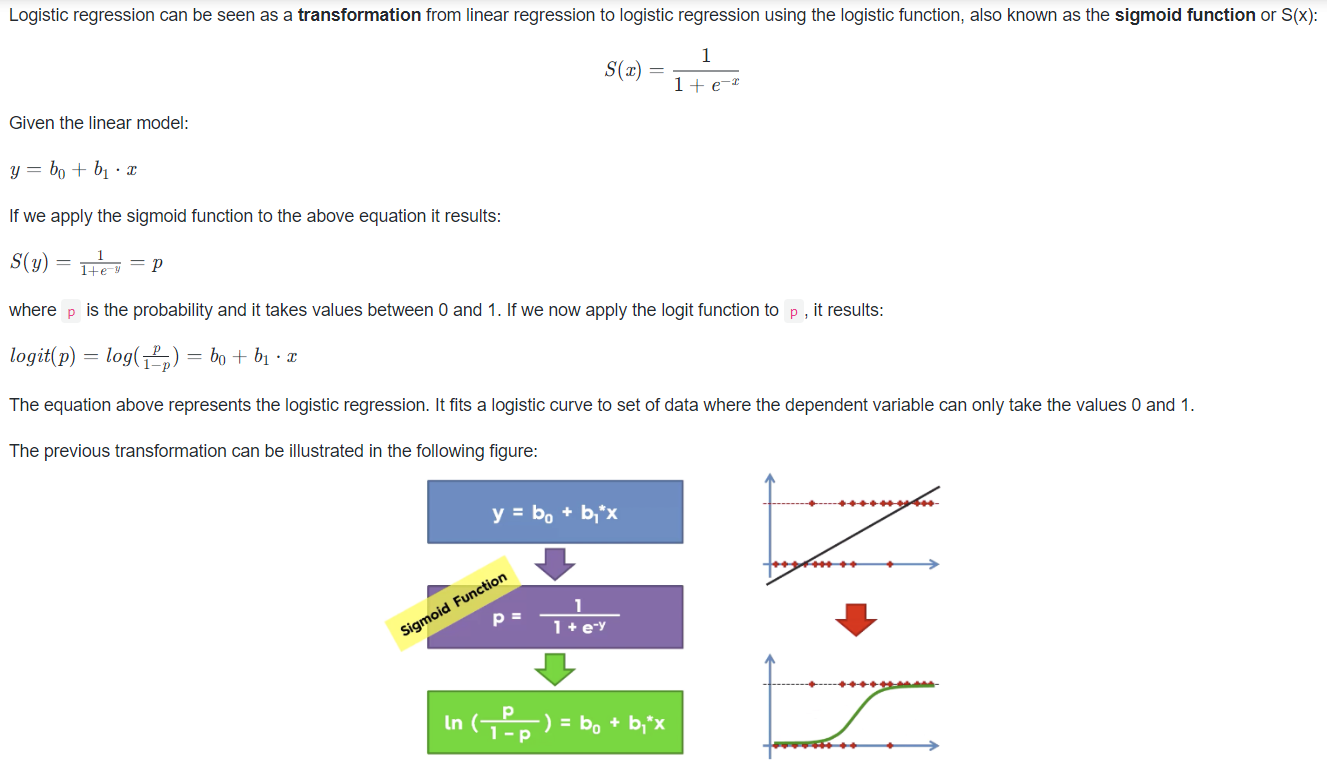

###**What can you infer from each of the hand drawn decision boundary of Logistic Regression below?**

**Problem**

Also, what should we do to fix the problem of each decision boundary?

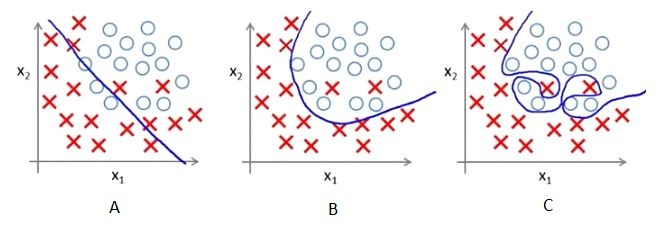

**Answer**

What can we infer:

* A: the model underfits the data. It will give us the maximum error compared to other two models.
* B: best-fitting model.
* C: the model overfits the data. It performs exceptionally well on training data but performs considerably worse on test data.

What can we do to fix the problem:

* A: increase the complexity of the model or increase the number of independent variables.
* B: best performing model, so we don't need to tweak anything.
* C: add regularization method to the model.

###**What is the difference between Linear Regression and Logistic Regression?**

**Linear regression** output as probabilities In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. In logistic regression, the outcome (dependent variable) has only a limited number of possible values.

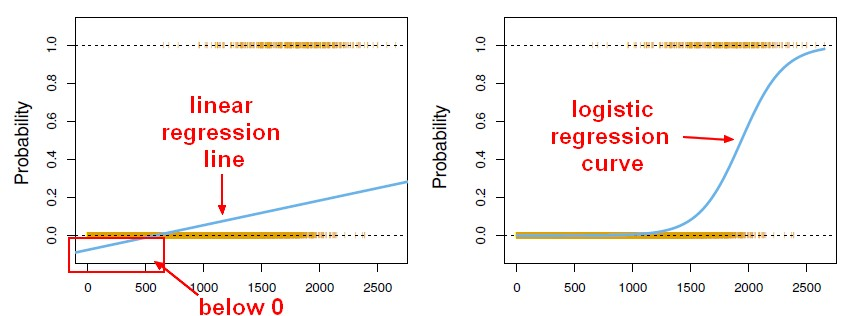

**Outcome** In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. In logistic regression, the outcome (dependent variable) has only a limited number of possible values.

**The dependent variable** Logistic regression is used when the response variable is categorical in nature. For instance, yes/no, true/false, red/green/blue, 1st/2nd/3rd/4th, etc. Linear regression is used when your response variable is continuous. For instance, weight, height, number of hours, etc.

**Equation Linear regression** gives an equation which is of the form Y = mX + C, means equation with degree 1. However, logistic regression gives an equation which is of the form Y = eX + e-X

**Coefficient interpretation** In linear regression, the coefficient interpretation of independent variables are quite straightforward (i.e. holding all other variables constant, with a unit increase in this variable, the dependent variable is expected to increase/decrease by xxx). However, in logistic regression, depends on the family (binomial, Poisson, etc.) and link (log, logit, inverse-log, etc.) you use, the interpretation is different.

**Error minimization technique** Linear regression uses ordinary least squares method to minimise the errors and arrive at a best possible fit, while logistic regression uses maximum likelihood method to arrive at the solution. Linear regression is usually solved by minimizing the least squares error of the model to the data, therefore large errors are penalized quadratically. Logistic regression is just the opposite. Using the logistic loss function causes large errors to be penalized to an asymptotically constant. Consider linear regression on categorical {0, 1} outcomes to see why this is a problem. If your model predicts the outcome is 38, when the truth is 1, you've lost nothing. Linear regression would try to reduce that 38, logistic wouldn't (as much)2.


###**What's the difference between Softmax and Sigmoid functions?**

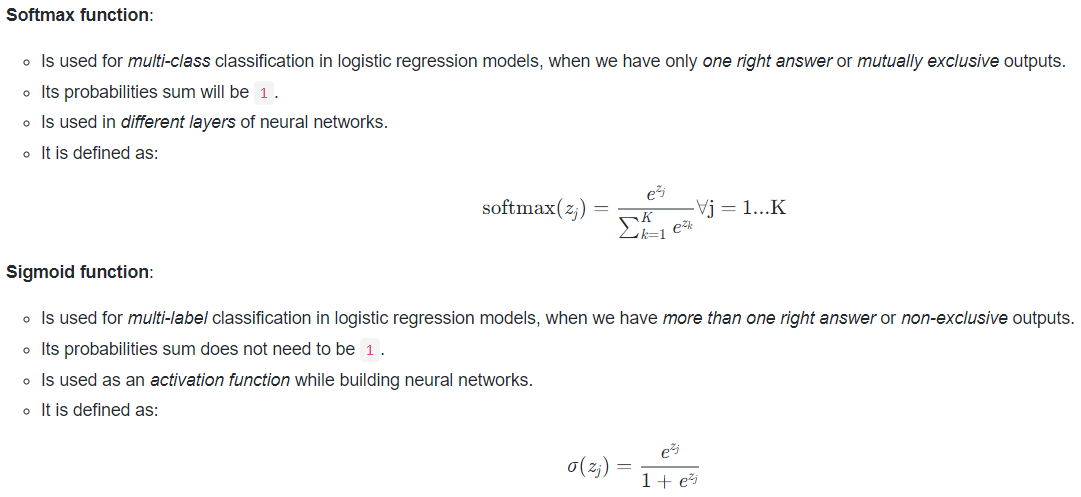

###**Why can't a Linear Regression be used instead of Logistic Regression?**

It is required for the independent and dependent variables to be linear for linear regression models, but the independent and dependent variables are not required to have a linear relationship in logistic functions.

The Linear Regression models assume that the error terms are normally distributed (bell-shaped graph) whereas there are no error terms in Logistic Regression because it is assumed to follow a Bernoulli distribution.

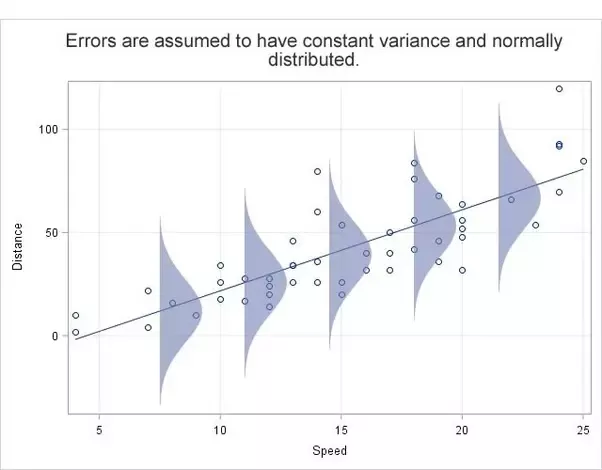

Linear regression has a continuous output. Logistic regression does not have a continuous output, rather the output is a probability between 0 and 1. A linear regression may have an output that can go beyond 0 and 1.

###**Why don’t we use Mean Squared Error as a cost function in Logistic Regression?**

In Linear Regression, we used the Squared Error mechanism.

For Logistic Regression, such a cost function produces a non-convex space with many local minimums, in which it would be very difficult to minimize the cost value and find the global minimum.

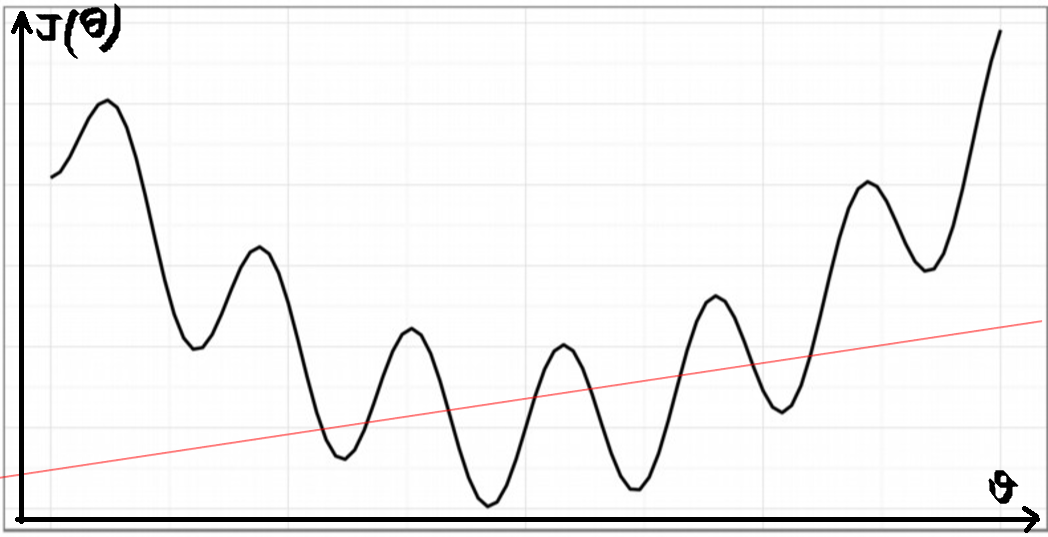

###**Why is Logistic Regression considered a Linear Model?**

A model is considered linear if the transformation of features that is used to calculate the prediction is a linear combination of the features. Although Logistic Regression uses Sigmoid function which is a nonlinear function, the model is a generalized linear model because the outcome always depends on the sum of the inputs and parameters.

i.e the logit of the estimated probability response is a linear function of the predictors parameters.

### \begin{align*}
    \log \left({p\over 1-p}\right) &= w_0 + w_1x_1+ ...+ w_jx_j \nonumber \\
    &= w^Tx \nonumber
\end{align*}

where:

- $w_{0}$ is the intercept term, and $w_1$ to $w_j$ represents the parameters for all the other features (a total of j features).
- By convention of we can assume that $x_0 = 1$, so that we can re-write the whole thing using the matrix notation $w^Tx$.


###**Discuss the space complexity of Logistic Regression.**

**During training:** We need to store four things in memory: x, y, w, and b during training a Logistic Regression model.

Storing b is just 1 step, i.e, O(1) operation since b is a constant.
x and y are two matrices of dimension (n x d) and (n x 1) respectively. So, storing these two matrices takes O(nd + n) steps.

Lastly, w is a vector of size-d. Storing it in memory takes O(d) steps.
Therefore, the space complexity of Logistic Regression while training is O(nd + n +d).

During Runtime or Testing: After training the model what we just need to keep in memory is w. We just need to perform wT*xi to classify the points.

Hence, the space complexity during runtime is in the order of d, i.e, O(d).

###**What are the advantages of Logistic Regression?**

The advantages of the logistic regression are as follows:

1. Logistic Regression is very easy to understand.

2. It requires less training.

3. It performs well for simple datasets as well as when the data set is linearly separable.

4. It doesn’t make any assumptions about the distributions of classes in feature space.

5. A Logistic Regression model is less likely to be over-fitted but it can overfit in high dimensional datasets. To avoid over-fitting these scenarios, One may consider regularization.

###**What are the disadvantages of Logistic Regression?**

The disadvantages of the logistic regression are as follows:

1. Sometimes a lot of Feature Engineering is required.

2. If the independent features are correlated with each other it may affect the performance of the classifier.

3. It is quite sensitive to noise and overfitting.

4. Logistic Regression should not be used if the number of observations is lesser than the number of features, otherwise, it may lead to overfitting.

5. By using Logistic Regression, non-linear problems can’t be solved because it has a linear decision surface. But in real-world scenarios, the linearly separable data is rarely found.

6. By using Logistic Regression, it is tough to obtain complex relationships. Some algorithms such as neural networks, which are more powerful, and compact can easily outperform Logistic Regression algorithms.

7. In Linear Regression, there is a linear relationship between independent and dependent variables but in Logistic Regression, independent variables are linearly related to the log odds (log(p/(1-p)).

##**Decision Tree**

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
The decisions or the test are performed on the basis of features of the given dataset.

It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.

In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

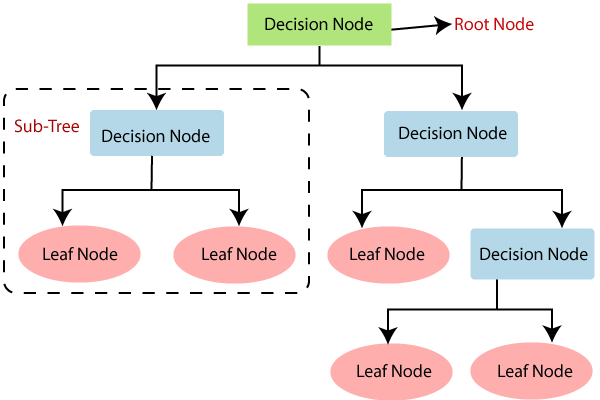

**Decision Tree Terminologies**

* **Root Node:** Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.

* **Leaf Node:** Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.

* **Splitting:** Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.

* **Branch/Sub Tree:** A tree formed by splitting the tree.

* **Pruning:** Pruning is the process of removing the unwanted branches from the tree.

* **Parent/Child node:** The root node of the tree is called the parent node, and other nodes are called the child nodes.

###**How does the Decision Tree algorithm Work?**

In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree. The complete process can be better understood using the below algorithm:

* **Step-1:** Begin the tree with the root node, says S, which contains the complete dataset.
* **Step-2:** Find the best attribute in the dataset using Attribute Selection Measure (ASM).
* **Step-3:** Divide the S into subsets that contains possible values for the best attributes.
* **Step-4:** Generate the decision tree node, which contains the best attribute.
* **Step-5:** Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.

###**Attribute Selection Measures**

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

While implementing a Decision tree, the main issue arises that how to select the best attribute for the root node and for sub-nodes. So, to solve such problems there is a technique which is called as Attribute selection measure or ASM. By this measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:

* **Information Gain**
* **Gini Index**

**1. Information Gain:**

Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.

It calculates how much information a feature provides us about a class.
According to the value of information gain, we split the node and build the decision tree.

A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:

**Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature)]**

**Entropy:** Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:

**Entropy(s)= -P(yes)log2 P(yes)- P(no) log2 P(no)**

Where

* S= Total number of samples
* P(yes)= probability of yes
* P(no)= probability of no

**2. Gini Index:**

Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
An attribute with the low Gini index should be preferred as compared to the high Gini index.

It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.

Gini index can be calculated using the below formula:

**Gini Index= 1- ∑ jPj2**

###**Pruning: Getting an Optimal Decision tree**

**Pruning** is a process of deleting the unnecessary nodes from a tree in order to get the optimal decision tree.

A too-large tree increases the risk of overfitting, and a small tree may not capture all the important features of the dataset. Therefore, a technique that decreases the size of the learning tree without reducing accuracy is known as **Pruning**. There are mainly two types of tree pruning technology used:

* Cost Complexity Pruning
* Reduced Error Pruning.

###**Advantages of the Decision Tree**

* It is simple to understand as it follows the same process which a human follow while making any decision in real-life.

* It can be very useful for solving decision-related problems.

* It helps to think about all the possible outcomes for a problem.

* There is less requirement of data cleaning compared to other algorithms.

###**Disadvantages of the Decision Tree**

* The decision tree contains lots of layers, which makes it complex.

* It may have an overfitting issue, which can be resolved using the Random Forest algorithm.

* For more class labels, the computational complexity of the decision tree may increase.

###**What are Decision Trees?**

Decision trees is a tool that uses a tree-like model of decisions and their possible consequences. If an algorithm only contains conditional control statements, decision trees can model that algorithm really well.

Decision trees are a non-parametric, supervised learning method.

Decision trees are used for classification and regression tasks.

The diagram below shows an example of a decision tree (the dataset used is the Titanic dataset to predict whether a passenger survived or not):

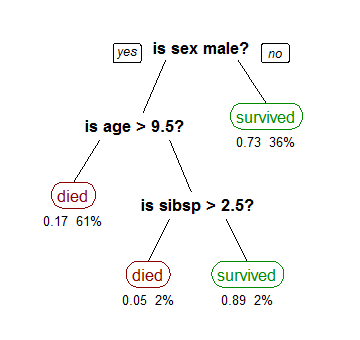


###**How is a Random Forest related to Decision Trees?**

Random forest is an ensemble learning method that works by constructing a multitude of decision trees. A random forest can be constructed for both classification and regression tasks.

Random forest outperforms decision trees, and it also does not have the habit of overfitting the data as decision trees do.

A decision tree trained on a specific dataset will become very deep and cause overfitting. To create a random forest, decision trees can be trained on different subsets of the training dataset, and then the different decision trees can be averaged with the goal of decreasing the variance.

###**What type of node is considered Pure?**

If the Gini Index of the data is 0 then it means that all the elements belong to a specific class. When this happens it is said to be pure.

When all of the data belongs to a single class (pure) then the leaf node is reached in the tree.

The leaf node represents the class label in the tree (which means that it gives the final output).

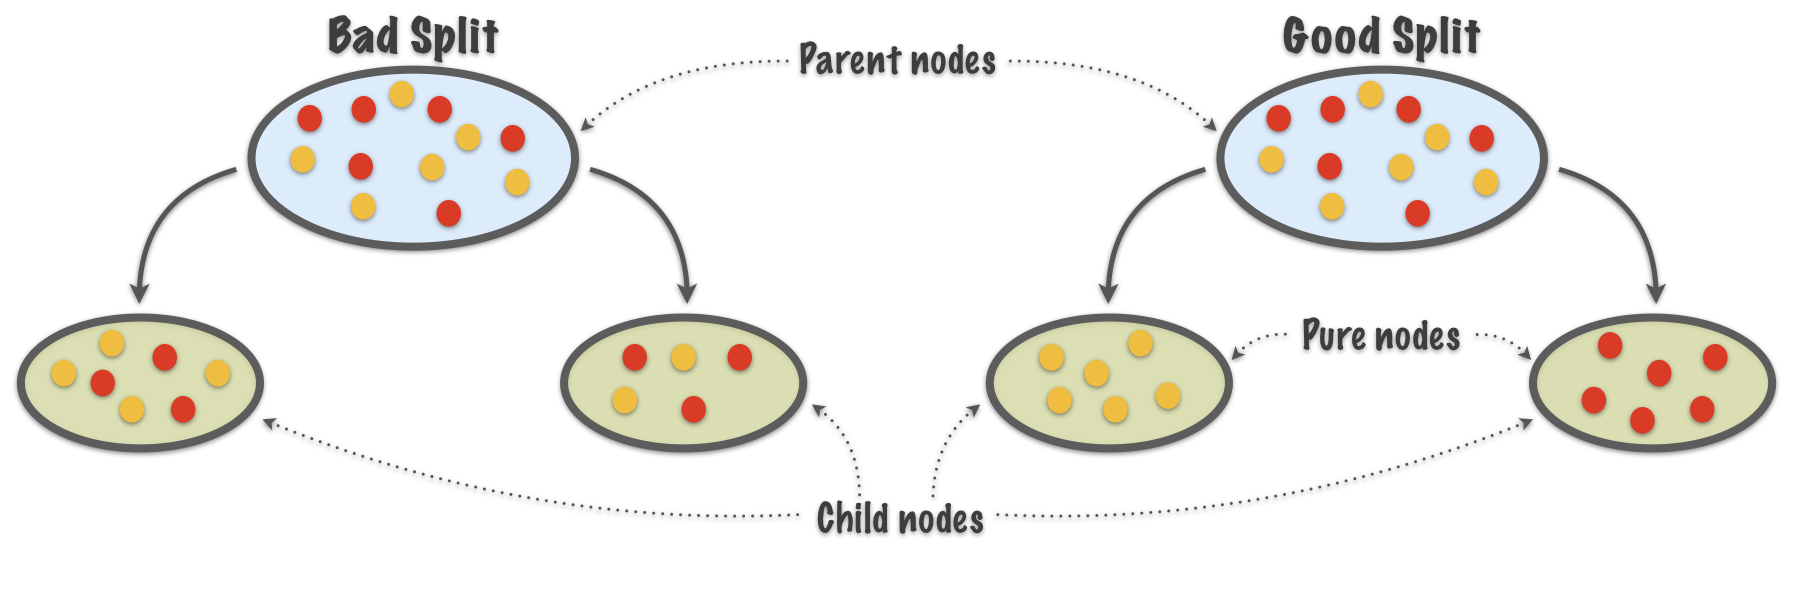

###**Compare Linear Regression and Decision Trees**

**Linear regression** is used to predict continuous outputs where there is a linear relationship between the features of the dataset and the output variable.

**Decision trees** work by splitting the dataset, in a tree-like structure, into smaller and smaller subsets and make predictions based on which subset the new example falls into.

**Linear regression** is used for regression problems where it predicts something with infinite possible answers such as the price of a house.

**Decision trees** can be used to predict both regression and classification problems.

**Linear regression** is prone to underfitting the data. Switching to polynomial regression will sometimes help in countering underfitting.

**Decision trees** are prone to overfit the data. Pruning helps with the overfitting problem.


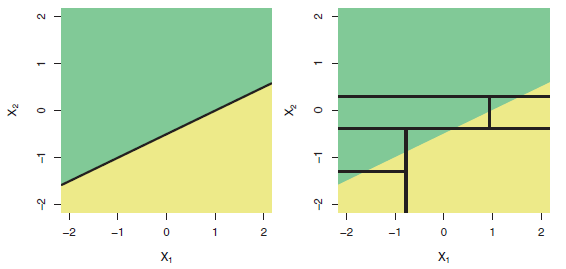

###**How does the CART algorithm produce Regression Trees?**

In the case of regression trees, the CART algorithm looks for splits that minimize the Least Square Deviation (LSD).

Least squares is an approach in regression analysis to approximate the solution of systems where the number of equations is higher than the number of unknowns (overdetermined systems). It does this by minimizing the sum of the squares of the residuals made in the results of every single equation.

In the case of decision trees, the LSD metric minimizes the sum of the squared distances between observed values and the predicted values. The difference between the observed and predicted values is called residual.

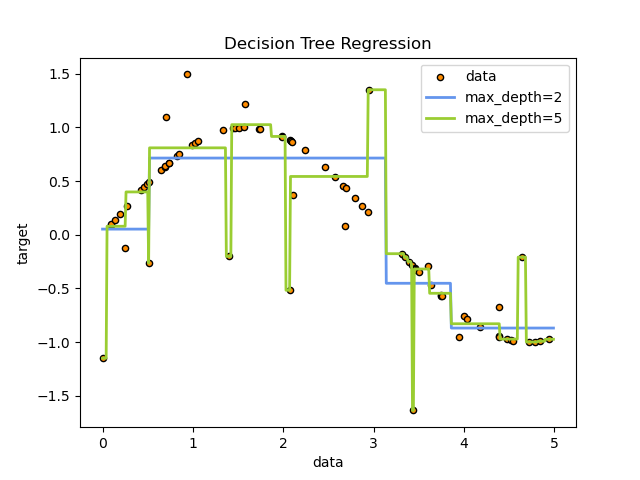

###**How would you deal with an Overfitted Decision Tree?**

We can deal with the overfitted decision tree by reducing its complexity through the Pruning technique, which is changing the model by deleting the child nodes of a branch node.

The pruning processes can occur in:

* **Bottom-up fashion:** Start at the lowest node in the tree and follow recursively upwards to determine the relevance of each node. If the relevance for the classification is not given, the node is dropped or replaced by a leaf.

* **Top-down fashion:** Starts at the root of the tree. Following the
structure below, a relevance check is carried out which decides whether a node is relevant for the classification. Here, an entire sub-tree (regardless of its relevance) can be dropped.

There is also a popular pruning algorithm called reduced error pruning, in which starting at the leaves, each node is replaced with its most popular class. If the prediction accuracy is not affected then the change is kept.

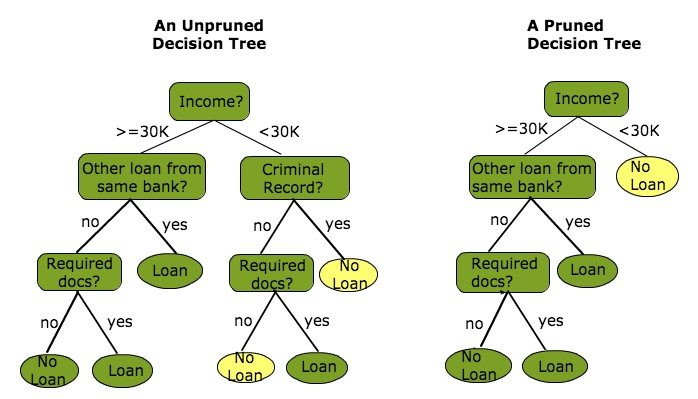

###**How would you define the Stopping Criteria for decision trees?**

A stopping criteria is needed when a decision tree learner runs, otherwise, it would overfit the data making it unable to give accurate predictions for new data. Some ways to define stopping criteria are as follows:

* Assigning a minimum count in the number of training instances assigned to each leaf node. If the count is less than the minimum then the split is not accepted and the node is taken as a final leaf node.

* Assigning a pre-specified depth of the tree so that the decision tree is not so complex that it overfits the data.

* Stopping when predictor values for all nodes are identical. When this happens, no rule can be generated to split the node.

###**What is Gini Index and how is it used in Decision Trees?**

**Gini Index** is also known as **Gini Impurity**.

It calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly.

Gini index varies between 0 and 1. A Gini index of 0 means that all of the elements belong to a specific class, and 1 indicates a random distribution of elements across various classes. A value of 0.5 shows an equal distribution of elements over some classes.

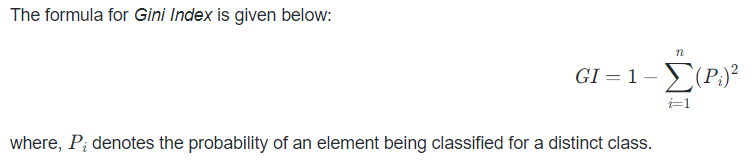

In decision trees, the features possessing the least value of Gini Index get preferred over others.

###**What is Greedy Splitting?**

Greedy Splitting is also called Recursive Binary Splitting.

In this procedure all the features are considered and different split points are tried and tested using a cost function. The split with the best cost (or lowest cost) is selected.

All input variables and all possible split points are evaluated and chosen in a greedy manner (choosing the lowest value of cost possible).

###**What is Tree Boosting?**

Boosting is an ensemble meta-algorithm.

It is used to reduce bias, and also variance in supervised learning.

In boosting, models are learned sequentially with early models fitting the simple models to the data and then analyzing the data for errors. So, consecutive decision trees are fit at every step, with the goal of solving for the net error from the prior tree. Each decision tree dictates what feature the next one will work on (it is more like teamwork rather than all trees working independently). When an input is misclassified, its weight is increased so that the next decision tree is more likely to classify it correctly.

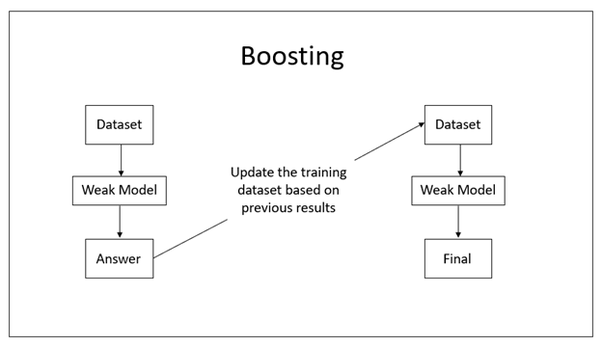


###**What is the difference between Post-pruning and Pre-pruning?**

**Pruning** involves cutting back the tree. After a tree has been built, it might have overfit the data. There are many ways to prune a tree, some of which are:

* **Minimum error:** The tree is pruned back to the point where the cross-validation error is minimum.
* **Smallest tree:** The tree is pruned back slightly further than the minimum error.

**Pre-pruning** is also known as **early-stopping**. In this method, the overfitting of the data may also be prevented by stopping the tree-building process early (before it produces leaf nodes with very small samples). Pre-pruning can underfit the data by stopping too early. A method to pre-prune a tree is described below:

* At each stage of splitting the tree, the cross-validation error can be checked. If the error does not decrease significantly enough then the process can be stopped.

* Pruning and pre-pruning can both be used together, separately, or not at all. Post-pruning is more mathematically rigorous when compared to pre-pruning.

###**Why do you need to Prune the decision tree?**

After a tree has been built (and in the absence of early stopping discussed below) it may be overfitted. **Pruning** reduces the size of decision trees by removing parts of the tree that do not provide power to classify instances.

* **Pruning** the tree after it learns can increase its performance.

* **Pruning** is a technique that reduces the size of the decision trees by removing sections of the tree that are non-critical and redundant to classify instances.

* If the tree is too large then there is a **risk of overfitting**, but if the tree is too small then it will not be able to generalize the problem. Pruning helps to keep the tree in a reduced size without affecting the performance in a bad way.

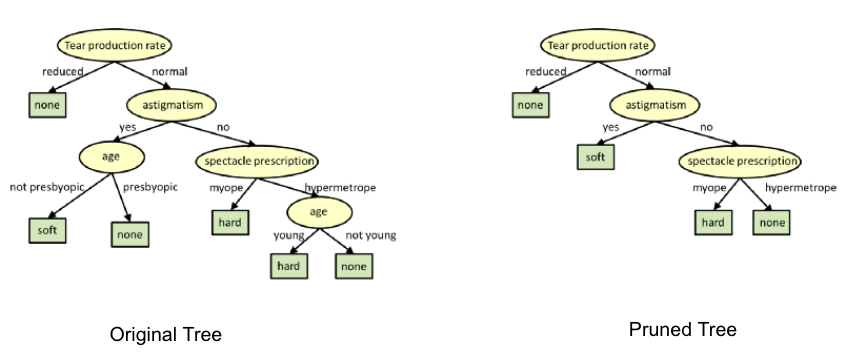

We can use cross-validation to see how the error in the tree changes with the size of the tree. Beyond some size, the cross-validation error gradually increases, which can be a sign of **overfitting**.

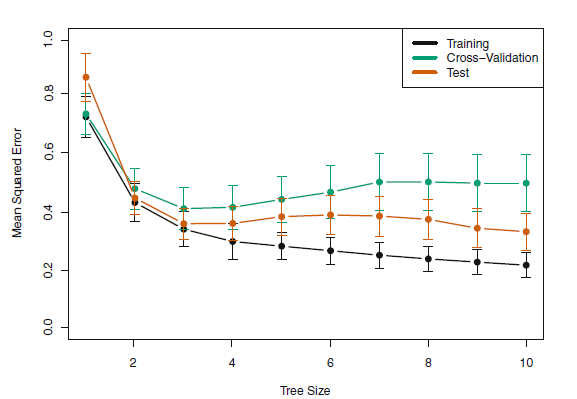



###**What do you understand by Pruning in a Decision Tree?**

When we remove sub-nodes of a Decision node, this process is called pruning or the opposite process of splitting. The two techniques which are widely used for pruning are- Post and Pre Pruning.

**Post Pruning:**

* This type of pruning is used after the construction of the Decision Tree.
* This technique is used when the Decision Tree will have a very large depth and will show the overfitting of the model.
* It is also known as backward pruning.
This technique is used when we have an infinitely grown Decision Tree.

**Pre Pruning:**

* This technique is used before the construction of the Decision Tree.
* Pre-Pruning can be done using Hyperparameter tuning.
* Overcome the overfitting issue.

###**List down the advantages of the Decision Trees.**

1. **Clear Visualization:**  This algorithm is simple to understand, interpret and visualize as the idea is mostly used in our daily lives. The output of a Decision Tree can be easily interpreted by humans.

2. **Simple and easy to understand:** Decision Tree works in the same manner as simple if-else statements which are very easy to understand.

3. This can be used for both classification and regression problems.

4. Decision Trees can handle both continuous and categorical variables.

5. **No feature scaling required:** There is no requirement of feature scaling techniques such as standardization and normalization in the case of Decision Tree as it uses a rule-based approach instead of calculation of distances.

6. **Handles nonlinear parameters efficiently:** Unlike curve-based algorithms, the performance of decision trees can’t be affected by the Non-linear parameters. So, if there is high non-linearity present between the independent variables, Decision Trees may outperform as compared to other curve-based algorithms.

7. Decision Tree can automatically handle missing values.

8. Decision Tree handles the outliers automatically, hence they are usually robust to outliers.

9. **Less Training Period:** The training period of decision trees is less as compared to ensemble techniques like Random Forest because it generates only one Tree unlike the forest of trees in the Random Forest.

###**List out the disadvantages of the Decision Trees.**

1. **Overfitting:** This is the major problem associated with the Decision Trees. It generally leads to overfitting of the data which ultimately leads to wrong predictions for testing data points. it keeps generating new nodes in order to fit the data including even noisy data and ultimately the Tree becomes too complex to interpret. In this way, it loses its generalization capabilities. Therefore, it performs well on the training dataset but starts making a lot of mistakes on the test dataset.

2. **High variance:** As mentioned, a Decision Tree generally leads to the overfitting of data. Due to the overfitting, there is more likely a chance of high variance in the output which leads to many errors in the final predictions and shows high inaccuracy in the results. So, in order to achieve zero bias (overfitting), it leads to high variance due to the bias-variance tradeoff.

3. **Unstable:** When we add new data points it can lead to regeneration of the overall Tree. Therefore, all nodes need to be recalculated and reconstructed.

4. **Not suitable for large datasets:** If the data size is large, then one single Tree may grow complex and lead to overfitting. So in this case, we should use Random Forest instead, an ensemble technique of a single Decision Tree.

##**Random Forest**

**Random Forest** is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of **ensemble learning**, *which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.*

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

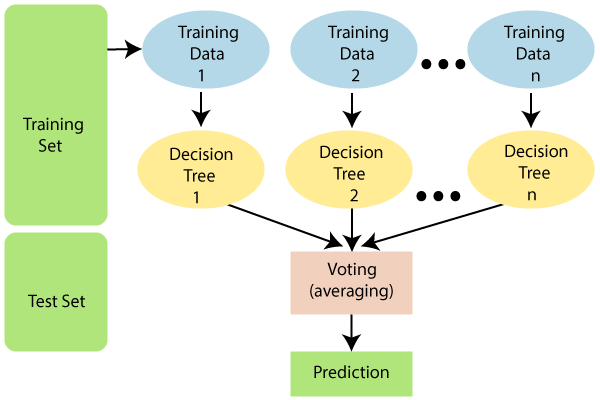

###**Assumptions for Random Forest**

Since the random forest combines multiple trees to predict the class of the dataset, it is possible that some decision trees may predict the correct output, while others may not. But together, all the trees predict the correct output. Therefore, below are two assumptions for a better Random forest classifier:

* There should be some actual values in the feature variable of the dataset so that the classifier can predict accurate results rather than a guessed result.
* The predictions from each tree must have very low correlations.


###**How does Random Forest algorithm work?**

Random Forest works in two-phase first is to create the random forest by combining N decision tree, and second is to make predictions for each tree created in the first phase.

The Working process can be explained in the below steps and diagram:

**Step-1:** Select random K data points from the training set.

**Step-2:** Build the decision trees associated with the selected data points (Subsets).

**Step-3:** Choose the number N for decision trees that you want to build.

**Step-4:** Repeat Step 1 & 2.

**Step-5:** For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.

The literary meaning of word **ensemble** is group. **Ensemble methods** involve group of predictive models to achieve a better accuracy and model stability.

Ensemble methods are known to impart supreme boost to tree based models.

Ensemble learning is one way to tackle bias-variance trade-off.

There are various ways to ensemble weak learners to come up with strong learners:

1. Bagging

2. Boosting

3. Stacking

###**1. Bagging:**

**Bagging** is an ensemble technique used to reduce the variance of our predictions by combining the result of multiple classifiers modeled on different sub-samples of the same data set. The following figure will make it clearer:

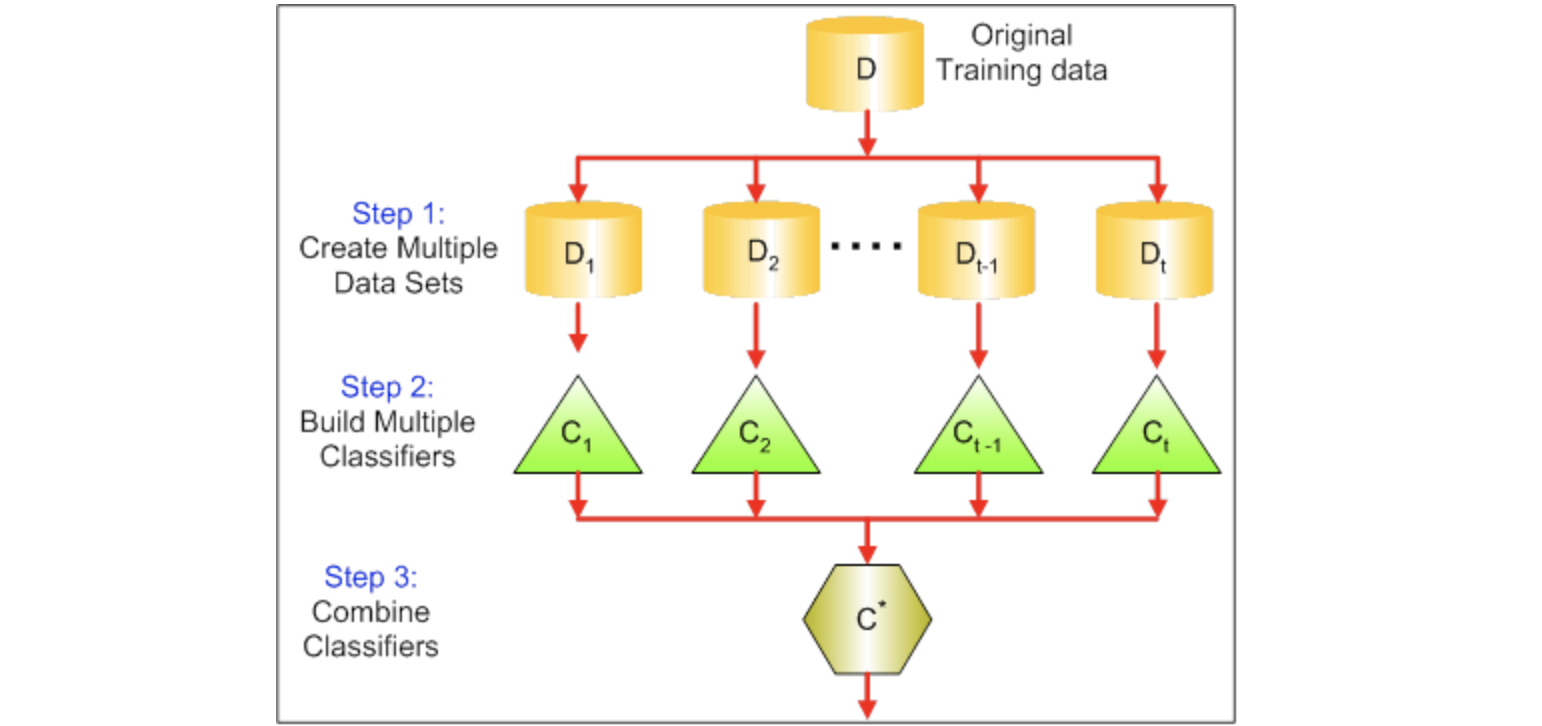

The steps followed in bagging are:

1. **Create Multiple DataSets:** Sampling is done with replacement on the original data and new datasets are formed.

2. **Build Multiple Classifiers:** Classifiers are built on each data set. Generally the same classifier is modeled on each data set and predictions are made.

3. **Combine Classifiers:** The predictions of all the classifiers are combined using a mean, median or mode value depending on the problem at hand.
The combined values are generally more robust than a single model.

Note that, here the number of models built is not a hyper-parameters. Higher number of models are always better or may give similar performance than lower numbers.

**Important: It can be theoretically shown that the variance of the combined predictions are reduced to 1/n (n: number of classifiers) of the original variance, under some assumptions. (Think Central Limit Theorem)**

There are various implementations of bagging models. Random forest is one of them and we’ll discuss it next.

###**2. Boosting:**

Boosting fit a sequence of weak learners − models that are only slightly better than random guessing, such as small decision trees − to weighted versions of the data. More weight is given to examples that were misclassified by earlier rounds.

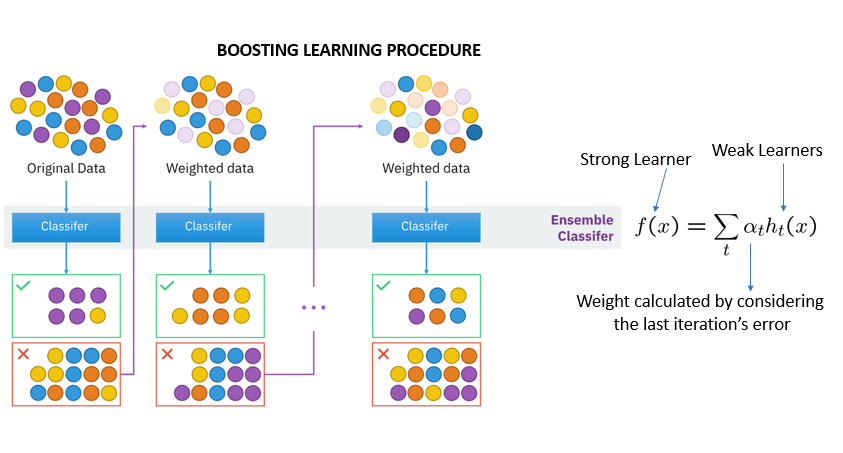

There are many boosting algorithms which impart additional boost to model’s accuracy:

1. Gradient Boosting Machine
2. XGBoost
3. AdaBoost
4. LightGBM
5. CatBoost

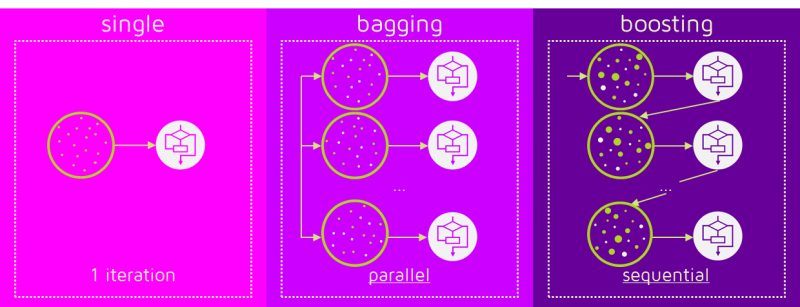

### **3. Stacking:**

**Stacking** or Stacked Generalization is an ensemble technique.

It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms.

The benefit of stacking is that it can harness the capabilities of a range of well-performing models on a classification or regression task and make predictions that have better performance than any single model in the ensemble.

Given multiple machine learning models that are skillful on a problem, but in different ways, how do you choose which model to use (trust)?

The approach to this question is to use another machine learning model that learns when to use or trust each model in the ensemble.

Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset).

Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).
The architecture of a stacking model involves two or more base models, often referred to as level-0 models, and a meta-model that combines the predictions of the base models, referred to as a level-1 model.

**Level-0 Models (Base-Models):** Models fit on the training data and whose predictions are compiled.

**Level-1 Model (Meta-Model):** Model that learns how to best combine the predictions of the base models.
The meta-model is trained on the predictions made by base models on out-of-sample data. That is, data not used to train the base models is fed to the base models, predictions are made, and these predictions, along with the expected outputs, provide the input and output pairs of the training dataset used to fit the meta-model.

The outputs from the base models used as input to the meta-model may be real value in the case of regression, and probability values, probability like values, or class labels in the case of classification.

###**Does Random Forest need Pruning? Why or why not?**

**Pruning** is a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances.

**Random Forest** usually does not require pruning because it will not over-fit like a single decision tree. This happens due to the fact that the trees are bootstrapped and that multiple random trees use random features so the individual trees are strong without being correlated with each other.

###**How is a Random Forest related to Decision Trees?**

Random forest is an ensemble learning method that works by constructing a multitude of decision trees. A random forest can be constructed for both classification and regression tasks.

Random forest outperforms decision trees, and it also does not have the habit of overfitting the data as decision trees do.

A decision tree trained on a specific dataset will become very deep and cause overfitting. To create a random forest, decision trees can be trained on different subsets of the training dataset, and then the different decision trees can be averaged with the goal of decreasing the variance.


###**How would you find the optimal size of the Bootstrapped Dataset?**

Due to the observations being sampled with replacements, even if the size of the bootstrapped dataset is different, the datasets will be different.

Due to this, the full size of the training data can be used.

Most of the time the best thing to do is not touch this hyperparameter.

###**What are Ensemble Methods?**

**Ensemble methods** is a machine learning technique that combines several base models in order to produce one optimal predictive model.

**Random Forest** is a type of ensemble method.

The number of component classifier in an ensemble has a great impact on the accuracy of the prediction, although there is a law of diminishing results in ensemble construction.


###**Explain the advantages of using Random Forest**

**Random Forest** is very versatile and can be used in both regression and classification tasks. It can also handle all binary, categorical, and numerical features.

The process is parallelizable where the process can be split to run in different machines.

It performs better in high dimensionality since the work is on subsets of data.

The training speed is faster than decision trees because they are working only on a subset of features. Even if there are hundreds of features the training speed will be significantly faster.

The Random Forest is good at balancing errors for class population unbalanced data sets.

It has low bias, but moderate variance because when all the trees are averaged in random forest, all the variances are also averaged so it has low bias but a moderate variance.


###**How does Random Forest handle missing values?**

The Random Forest methods encourage two ways of handling missing values:

* **Drop** data points with missing values. This is not recommended due to the fact that all the available data points is not used.

* **Fill** in the missing values with the median (for numerical values) or mode (for categorical values). This method will brush too broad a stroke for datasets with many gaps and significant structure.

There are other methods of filling in missing values such as calculating the similarity between the missing features, and the missing values estimated by weighting.

###**How is it possible to perform Unsupervised Learning with Random Forest?**

As part of their construction, random forest predictors naturally lead to a dissimilarity measure among the observations. One can also define a random forest dissimilarity measure between unlabeled data:

* the idea is to construct a random forest predictor that distinguishes the observed data from suitably generated synthetic data.

Many unsupervised learning methods require the inclusion of an input dissimilarity measure among the observations. Hence, if a dissimilarity matrix can be produced using Random Forest, unsupervised learning can be successfully implemented. The patterns found in the process will be used to make clusters.



###**How would you improve the performance of Random Forest?**

Some things to try to improve the performance of Random Forest are:

* Using a higher quality dataset and feature engineering. Using too many features and data are not good for the model so sometimes it is important to perform some feature reduction too.
* Tuning the hyperparameters of the algorithm.
* Trying different algorithms.

###**What are proximities in Random Forests?**

**Proximity** is the closeness or nearness between pairs of cases.

**Proximities** are calculated for each pair of cases/observations/sample points. If two cases occupy the same terminal node through one tree, their proximity is increased by one. At the end of the run of all trees, the proximities are normalized by dividing by the number of trees.

**Proximities** are used in replacing missing data, locating outliers, and producing illuminating low-dimensional views of the data.

###**What does Random refer to in Random Forest?**

Random forest is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Hence, random forest is Random in the following ways:

* Each tree is trained on a random subset of features, which ensures low correlation among decision trees.
* Each tree in the forest is trained in 2/3-rd of the total training data and data points are drawn at random from the original dataset.

###**What is Entropy?**

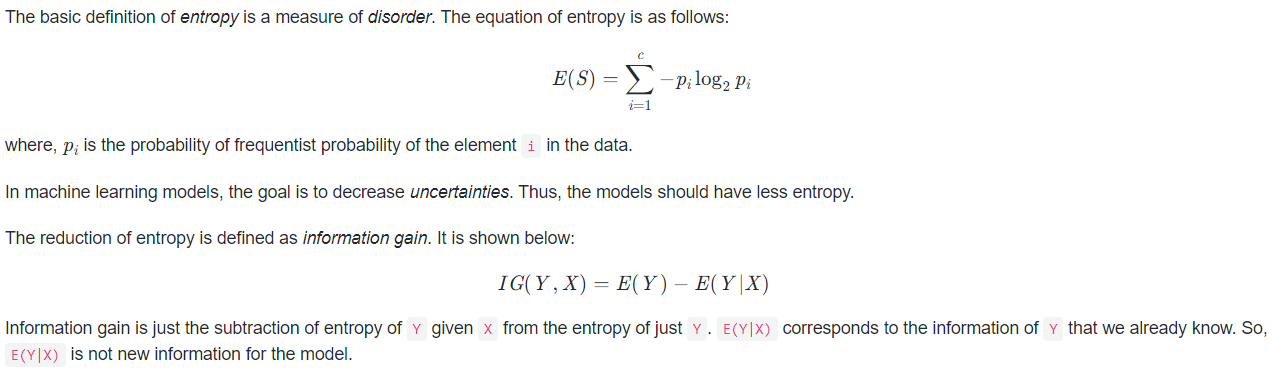

###**What is Out-of-Bag Error?**

**Out-of-bag error (OOB)** is a method of measuring the prediction of error of random forest.

OOB error is calculated in random forest classifier trained using bootstrap aggregation, where each new tree is fit from a bootstrap sample of training observations.

OOB error is the mean prediction error on each training sample x, using only trees that do not have x in their bootstrap sample.

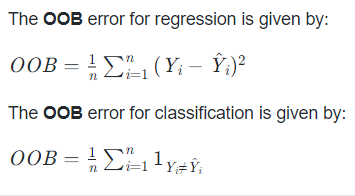

###**Why Random Forest models are considered not interpretable?**

Decision trees can be easily converted into rules which increase human interpretability of the results and explain why a decision was made.

For Random Forest the general recommendation is to use as many trees as possible. In most cases, with hundreds of trees, you wouldn't be able to understand why did they collectively made the decision that they made.

###**Why is the training efficiency of Random Forest better than Bagging?**

The difference between Random Forest and Bagging is the fact that for Random Forest only a subset of features out of all are selected in random and the best split feature from the subset is used to split each node in a tree.

In bagging all the features are considered in splitting the node.

Due to the fact that bagging considers all the features, the training efficiency of random forest is better.

###**List down some of the shortcomings of the Random Forest Algorithm.**

The shortcomings of the Random Forest algorithm are as follows:

1. Random Forests aren’t good at generalizing cases with completely new data.

For Example, If we know that the cost of one ice cream is 1 rupees, 2 ice-creams cost 2 rupees , and 3 ice-creams cost 3 rupees, then how much do 10 ice-creams cost? In such cases, Linear regression models can easily figure this out, while a Random Forest has no way of finding the answer.

2. Random forests are biased towards the categorical variable having multiple levels or categories. It is because the feature selection technique is based on the reduction in impurity and is biased towards preferring variables with more categories so the variable selection is not accurate for this type of data.

###**List down the advantages and disadvantages of the Random Forest Algorithm.**

**Advantages:**

* Random Forest is unbiased as we train multiple decision trees and each tree is trained on a subset of the same training data.

* It is very stable since if we introduce the new data points in the dataset, then it does not affect much as the new data point impacts one tree, and is pretty hard to impact all the trees.

* Also, it works well when you have both categorical and numerical features in the problem statement.

* It performs very well, with missing values in the dataset.

**Disadvantages:**

* Complexity is the major disadvantage of this algorithm. More computational resources are required and also results in a large number of decision trees combined together.

* Due to their complexity, training time is more compared to other algorithms.

##**Model Explainability**

Machine learning/AI explainability (also called XAI in short) is becoming increasingly popular. As algorithms become more and more prevalent in high-stakes decisions in industries such as finance, healthcare, and insurance, the demand for explainability will only grow.

Imagine that you have to present your newly built facial recognition feature to the technical heads of a SaaS product. The presentation goes relatively well until the CTO asks you “so what exactly goes on inside?” and all you can say is “nobody knows, it’s a black box”.

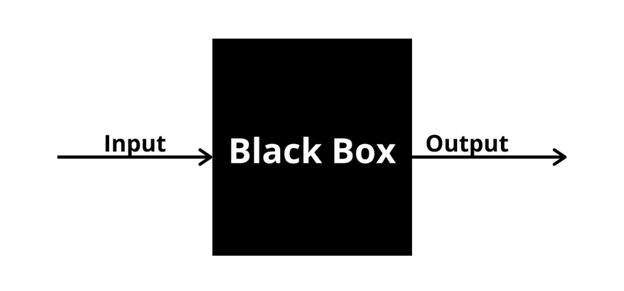

Pretty soon, other stakeholders would start to worry. “How can we trust something, if we don’t know what it does?”.

It’s a valid concern. For a long time, ML models were universally viewed as black boxes because we couldn’t explain what happened to the data between the input and the output. But now, we have explainability.

###**Black Box**

The black box is a device, system, or object which can be viewed in terms of its inputs and outputs (or transfer characteristics), without any knowledge of its internal workings. Its implementation is "opaque" (black). Almost anything might be referred to as a black box: a transistor, an algorithm, or the human brain.

Black-box models, such as deep-learning (deep neural network), boosting, and random forest models, are highly non-linear by nature and are harder to explain in general. With black-box models, users can only observe the input-output relationship.

For example, input the customer profile then output customer churn propensity score. But the underlying reasons or processes to produce the output are not available.


###**White Box**

**White-box models** are the type of models in which one can clearly explain how they behave, how they produce predictions, and what the influencing variables are. Two key elements make a model white-box: features have to be understandable, and the ML process has to be transparent. These models include linear and decision/regression, tree models.

**Black-box models often result in better accuracy than white-box models, but you sacrifice transparency and accountability.**


###**Explainability And Interpretability**

**Explainability** in machine learning means that you can explain what happens in your model from input to output. It makes models transparent and solves the black box problem. **Explainability** is the degree to which a human can understand the cause of a decision or the degree to which a human can consistently predict ML model results. **Explainability** and interpretability are often used interchangeably. Although they have the same goal to understand the model.

A car needs fuel to move, i.e it is the fuel that causes the engines to move – **Interpretability.**

Understanding how and why the engine consumes and uses the fuel – **Explainability.**

However, when the model is explainable then we can go a step further – we should be able not only to explain what happened but also why – which variables contributed the most to the result, which relations in data were crucial, and how only causal relationships were picked up. Only then we can call a model auditable and able to gain the trust of users.

Take an example: you’re building a model that predicts pricing trends in the fashion industry. The model might be interpretable — you can see what you’re doing. But it’s not explainable yet. It will be explainable once you dig into the data and features behind the generated results. Understanding what features contribute to the model’s prediction and why they do is what explainability is all about.

**Explainable AI** is about understanding ML models better. How they make decisions, and why. The three most important aspects of model explainability are:

1.	**Transparency**

2.	**Ability to question**

3.	**Ease of understanding**

The concept of explainability is usually used in contrast to the “black box” term.

When it comes to methods such as machine learning, neural networks, or AI the given systems can lack transparency or, what is worse, they can contain unconscious biases of their creators. The issue is present also in ‘classical’ models, but we already have some relatively well-established methods to detect them.

That is a big problem. And it is where the “model explainability” comes into place.


###**Why is Explainability important?**

Machine Learning gets a bad reputation when it negatively impacts business profits. This often happens because of the disconnection between the data science team and the business team.

Explainability connects the data science team and non-technical team, improving knowledge exchange, and giving all stakeholders a better understanding of product requirements and limitations. All of this promotes better governance.

But there are at least five more reasons why ML Explainability is important:

1. **Accountability:**

 When a model makes a wrong or rogue decision, knowing the factors that caused that decision, or who is responsible for that failure, is necessary to avoid similar problems in the future. With model explanation, data science teams can give organizations more control over their ML models.

2. **Trust:**

 In high-risk domains (like healthcare or finance), trust is critical. Before ML solutions can be used and trusted, all stakeholders must fully understand what the model does. If you claim that your model makes better decisions and notices patterns that humans don’t see, you need to be able to back it up with evidence. Domain experts will be naturally skeptical towards any technology that claims to see more than them.

3. **Compliance:**

 Model explainability is critical for data scientists, auditors, and business decision-makers alike to ensure compliance with company policies, industry standards, and government regulations.

4. **Performance:**

  Explainability can also improve performance. If you understand why and how your model works, you know exactly what to fine-tune and optimize.

  

5. **Enhanced control:**

 Understanding the decision-making process of your models shows you unknown vulnerabilities and flaws. With these insights, control is easy. The ability to rapidly identify and correct mistakes in low-risk situations adds up, especially when applied across all models in production.


###**Approaches to Explainability**

You can approach explainability in two ways:

**1.	Globally :**

 This is the overall explanation of model behavior. It shows us a big picture view of the model, and how features in the data collectively affect the result.

**2.	Locally :**

 This tells us about each instance and feature in the data individually (kind of like explaining observations seen at certain points in the model), and how features individually affect the result.


###**Explainable models**

A few models in ML have the characteristics property of explainability i.e transparency, ease of understanding, and ability to question. Let’s take a look at a few of them.

**1. Linear models:**

Linear models such as linear regression, SVMs with linear kernel, etc follow the linearity principle that two or more variables can be added together so that their sum is also a solution.

 E.g: y = m*x + c .

So a change in one of the features will affect the output. This is easy to understand and explain.


**2. Decision Tree Algorithms:**

Models that use decision trees are trained by learning simple decision rules gotten from prior data. Since they follow a specific set of rules, understanding the outcome simply depends on learning and understanding the rules that led to the outcome.  With the plot_tree  function in scikit-learn, you can see the visualization of how the algorithm got its output.

**3. Generalized Additive Models (GAM):**

GAMs are models where the usual relationship between predictive variables and dependent variable (response) is replaced by linear and nonlinear smooth functions to model and capture the non-linearity in the data. GAMs are generalized linear models with a smoothing function Owing to their addictive nature, each variable contributes to the output. Hence, we can explain the output of a GAM by simply understanding the predictive variables.

The thing with most explainable models is that they most times do not capture the complexity of some real-world problems and can be inadequate. Also, because a model is simple or linear that doesn’t guarantee explainability.

Neural networks or ensemble models, etc are complex models.

So, for complex models, we use techniques and tools to make them explainable. There are two main approaches:  

1.	**Model-Agnostic Approach**

2.	**Model-Specific Approach**


**3.1. Model-agnostic Approach :**

Model-agnostic techniques/tools can be used on any machine learning model, no matter how complicated. These agnostic methods usually work by analyzing feature input and output pairs. These are completely independent of the underlying machine learning models and that is their biggest advantage. Usually, we evaluate multiple machine learning models like Random forest, XGBoost, GBM, or deep neural networks to solve a single problem. When comparing models in terms of local interpretability, it is easier to work with model-agnostic explanations, because the same method can be used for any type of model.

A good example is LIME.


**3.2. Model-specific Approach :**

Model-specific techniques/tools are specific to a single type of model or a group of models.  They depend on the nature and functions of the specific model.

For example, tree interpreters.

###**Techniques for Explainability in ML**

**1. LIME: Local Interpretable Model-Agnostic Explanations**

**Definition:**


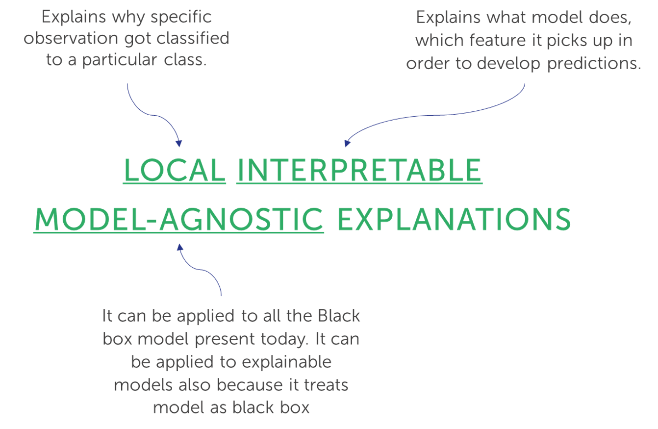

By generating an artificial dataset around the particular observation, we can try to approximate the predictions of the Black box model locally using a simple interpretable model. Then this model can be served as a ‘’local explainer’’ for the Black box model.

**However, the representation would vary with the type of data.** Lime supports Text data, Image data, and Tabular types of data:

*	**For text data:** It represents the presence or absence of words.

*	**For image:** It represents the presence or absence of super pixels.

*	**For tabular data:** It is a weighted combination of columns.

**Working:**


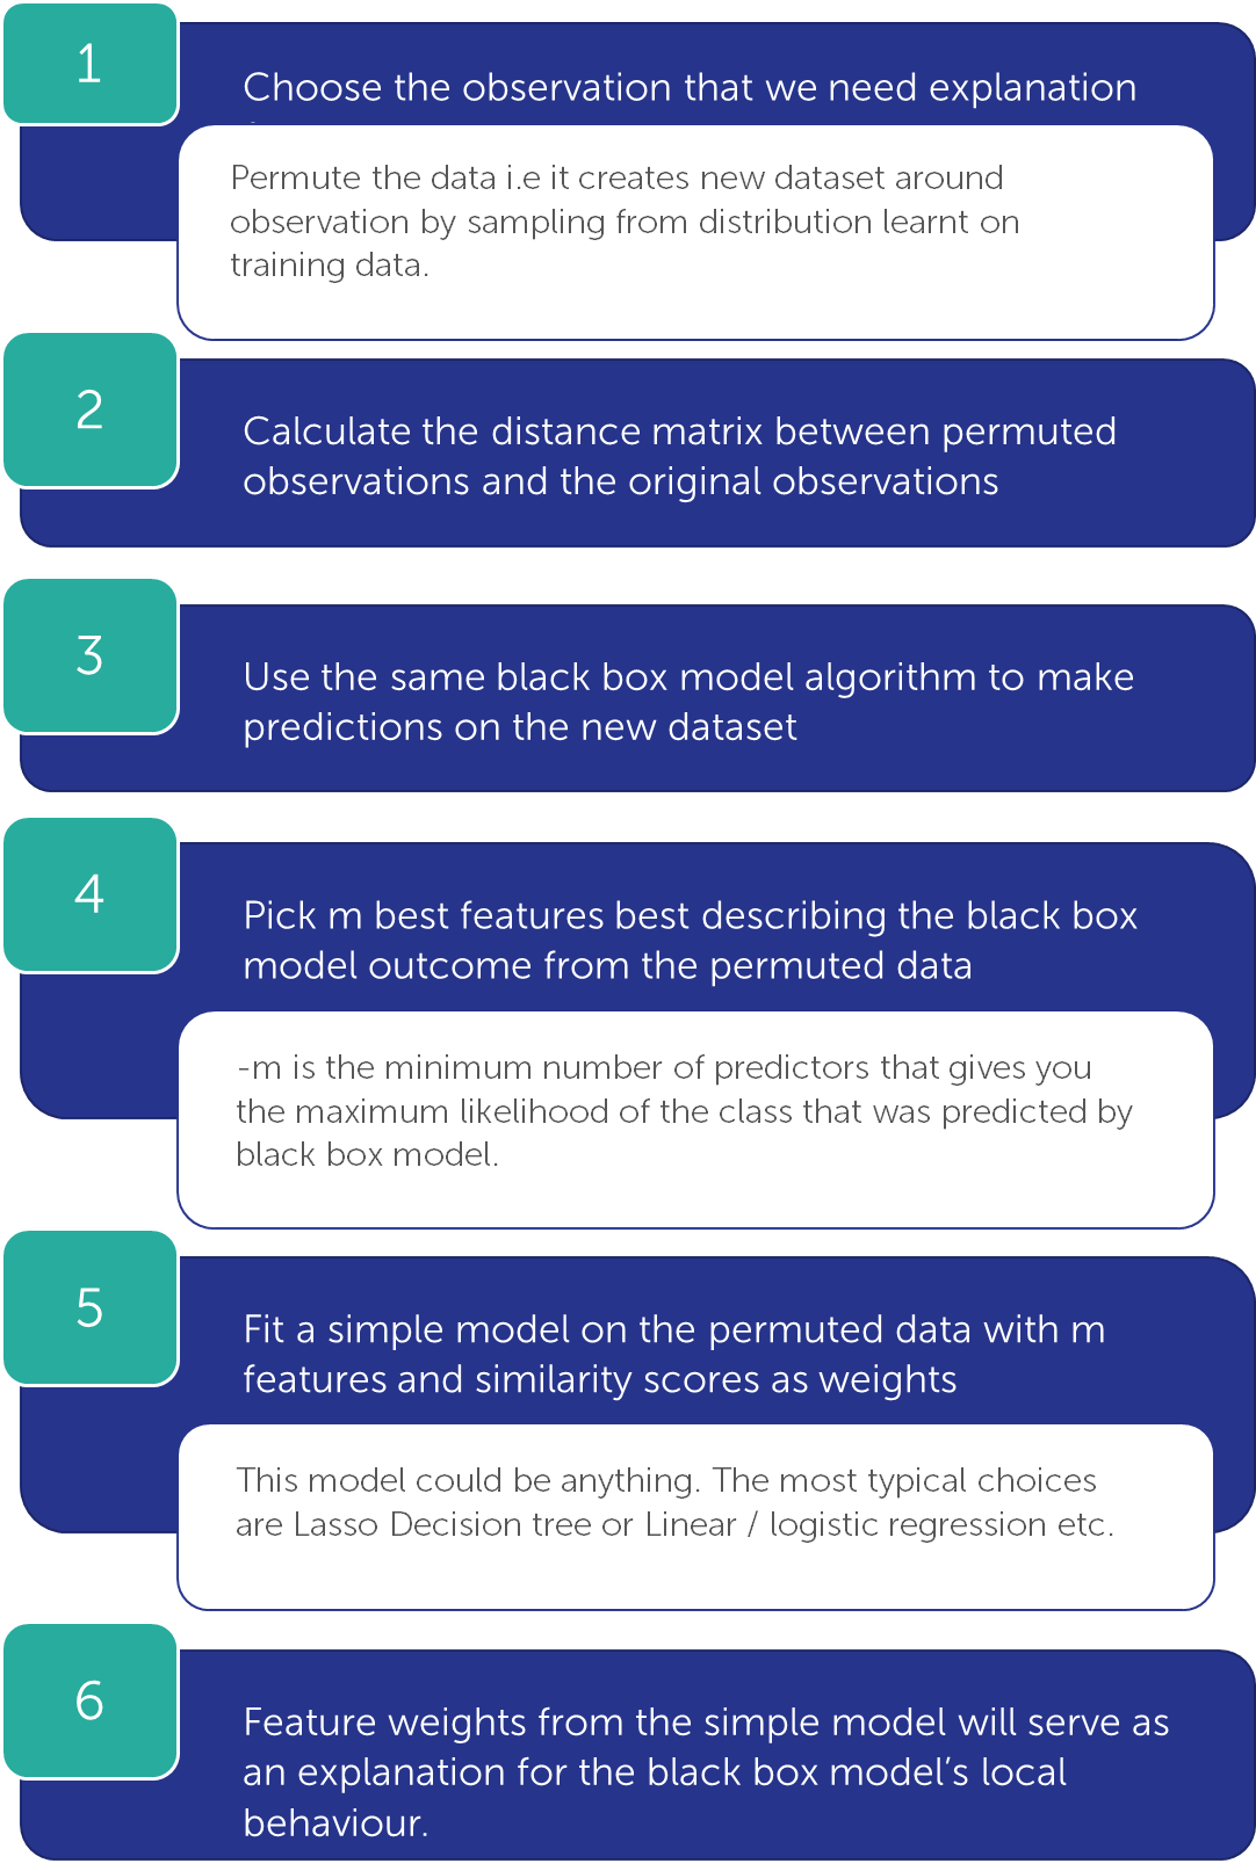

**The output of LIME in Python looks like this:**


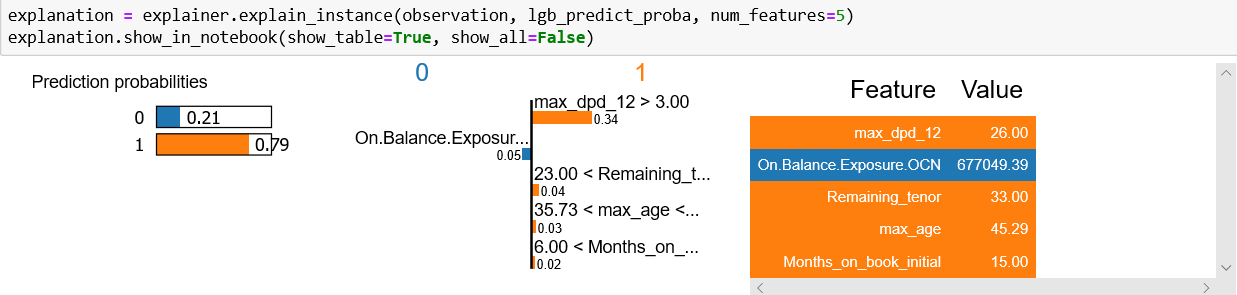

We see that Python gives us output is in 3 parts which can be interpreted as follows:

*	The leftmost fig shows that this particular customer has a very high (almost 80% ) chance of default.  
* The contribution of each feature to the prediction is denoted just below the feature name in the middle fig.
*	The table on the right shows the top 4 features(highlighted in orange) that favors class 1 and one feature (highlighted in blue) favors class 0 with actual values of the specific observation.

The reliability of this prediction can be given by R^2.

**Advantages of LIME :**

1.	LIME can be implemented in Python (packages: lime, Skater) and R (Packages: lime, iml, DALEX). It is very easy to use.
2.	Most of these packages are very flexible. You can specify m - the number of features for the model, how you want to permute your data, any simple model that would fit data.
3.	Furthermore LIME is the interpretation technique that works for tabular, text, and image data.


**Drawbacks of LIME :**

1.	The fitting of a linear model can be inaccurate (but we can check the R squared value to know if it is the case).
2.	Lime depends on the random sampling of new points (so it can be unstable).
3.	To be extra sure about the model understanding we can make use of SHAP in conjunction with LIME.


**2. SHAP: Shapley Additive Explanations**

**Definition:**

**SHAP (Shapley Additive exPlanations)** is the extension of the Shapley value, a game theory concept introduced in 1953 by mathematician and economist Lloyd Shapley. SHAP is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result. The concept is a mathematical solution for a game theory problem – how to share a reward among team members in a cooperative game?

Shapley's value assumes that we can compute the value of the surplus with or without each analyzed factor. The algorithm estimates the value of each factor by assessing the values of its ‘coalitions’. In the case of Machine Learning, the ‘surplus’ is a result of our algorithm and co-operators are different input values.
The goal of SHAP is to explain the prediction by computing the contribution of each feature to the final result.

**Working :**

SHAP procedure can be applied e.g. using a dedicated Python shap library. As an analyst, we can choose from three different explainers – functions within the shap library.
* 	TreeExplainer  - for the analysis of  decision trees
* 	DeepExplainer - for the deep learning algorithms
* 	KernelExplainer - for most other algorithms

We run the process always for a given observation. The starting point for the analysis is the average result in our data set. SHAP checks how the deviation from the average was impacted by each variable. SHAP explanation force plot in Python looks like this:

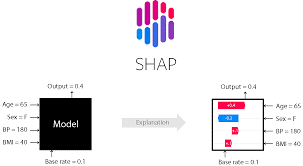

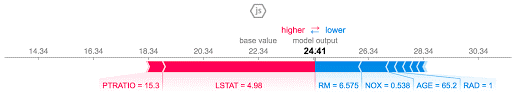

**The prediction starts from the baseline.** The baseline for Shapley values is the average of all predictions.
Each feature value is a force that either increases or decreases the prediction. Each feature contributing to pushing the model output from the base value to the model output.  Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.


**The prediction starts from the baseline.**

The baseline for Shapley values is the average of all predictions.
Each feature value is a force that either increases or decreases the prediction. Each feature contributing to pushing the model output from the base value to the model output.  Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

**Disadvantages of SHAP :**

* 	**Computational inefficiency.** There are 2k possible coalitions for the given number of k factors so depending on the number of variables the analyst must use a different level of simplification assumptions. However, on the contrary, SHAP has a fast implementation for tree-based models.

**3. ELI5 : Explain Like I'm 5**

**Definition:**

ELI5 is a python package used to understand and explain the prediction of classifiers such as sklearn regressors and classifiers, XGBoost, CatBoost, LightGBM, and Keras. It offers visualizations and debugging to these processes of these algorithms through its unified API. ELI5 understands text processing and can highlight text data. It can also implement techniques such as LIME and permutation importance.


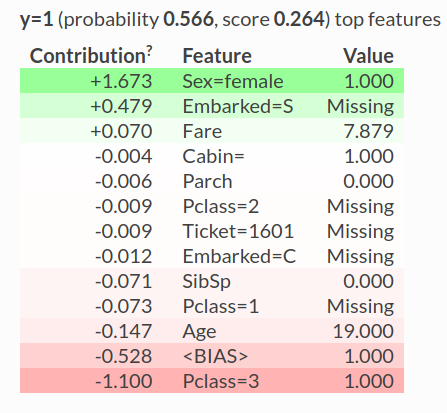

The resulting information for us showed that we can drop a lot of features that were not important. Here, We can see what is the probability for class 1 and what is the score for being in class 1. In the table above, we can see Contribution, features, and values. We can say contribution as the weights (W0 for bias, W1, W2,…, Wn.) and value as (X0 for bias, X1, X2,…, Xn). Missing indicates that the feature having xyz contribution was removed after feature selection.